In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from bams.example_systems import *
from bams.sams_adapter import SAMSAdaptor
from bams import convergence_analysis_tools as ctools

# Comparing SAMS and BAMS for independent state samples
This notebook compares the performance of SAMS and BAMS for the ideal case when one can sample exactly and independently from the state catogorical distribution. While this is unlikely to occur in practise, it is a necessary first step to validate the performance of the Bayesian scheme. In this setting, the Bayesians schemes are expected to dominate the SAMS schemes because the posterior density has been derived for this context.

The data from the online BAMS repeats will be loaded seperately as many repeats take a long time to compute. As SAMS is very quick to run, especially for this idea case, the convergence data will be computed in this notebook using the function below.

## Free energies in the range of -200 to 200
### Prior standard deviation of 100
This example tests the performance of SAMS and BAMS when the free energy between 2 states can span a range of 400 thermal units of energy. The prior for the Bayesian scheme has standard deviation of 100, so it is narrower than the distribution used to generate the target free energies. All initial guesses for the free energy difference between the two states start at 0.

In [18]:
# Loading BAMS convergence data
## Update scheme = Thompson sampling
error_thompson = np.load('t_spread=200/error_thompson.npy')
mu_error_thompson = error_thompson.mean(axis=0)
std_error_thompson = np.std(error_thompson, axis=0) / np.sqrt(error_thompson.shape[0])

# Update scheme = MAP estimate
error_map = np.load('t_spread=200/error_map.npy')
mu_error_map = error_map.mean(axis=0)
std_error_map = np.std(error_map, axis=0) / np.sqrt(error_map.shape[0])

# Loading SAMS convergence data
## Two stage procedure with beta = 0.5
error_sams_beta05 = ctools.binary_mse_multinomial(repeats=300, niterations=100, f_range=400.0, beta=0.5)
mu_error_sams_beta05 = error_sams_beta05.mean(axis=0)
std_error_sams_beta05 = error_sams_beta05.std(axis=0) / np.sqrt(error_sams_beta05.shape[0])

# Loading SAMS convergence data
## Two stage procedure with beta = 0.1
error_sams_beta01 = ctools.binary_mse_multinomial(repeats=300, niterations=100, f_range=400.0, beta=0.1)
mu_error_sams_beta01 = error_sams_beta01.mean(axis=0)
std_error_sams_beta01 = error_sams_beta01.std(axis=0) / np.sqrt(error_sams_beta01.shape[0])

#### Plotting the means-squared error for each method as a function of iteration

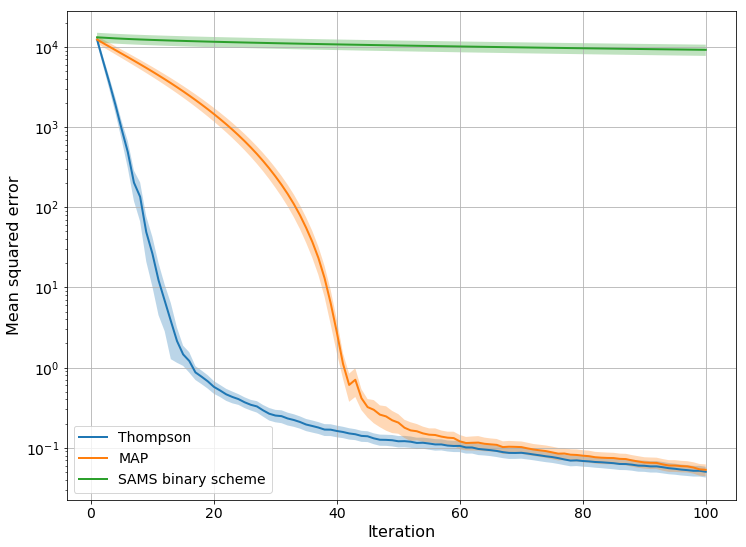

In [19]:
a = 0.3
plt.figure(figsize=(12,9))

t = np.arange(1, len(mu_error_map)+1)
# BAMS Thompson
plt.semilogy(t, mu_error_thompson, lw=2, label='Thompson')
upper = mu_error_thompson + 2.0 * std_error_thompson
upper = np.reshape(upper, upper.shape[0])
lower = mu_error_thompson - 2.0 * std_error_thompson
lower = np.reshape(lower, lower.shape[0])
plt.fill_between(t, lower, upper, alpha=a)

# BAMS MAP
plt.semilogy(t, mu_error_map, lw=2, label='MAP')
upper = mu_error_map + 2.0 * std_error_map
upper = np.reshape(upper, upper.shape[0])
lower = mu_error_map - 2.0 * std_error_map
lower = np.reshape(lower, lower.shape[0])
plt.fill_between(t, lower, upper, alpha=a)

# SAMS beta=0.5
plt.semilogy(t, mu_error_sams_beta05, lw=2, label='SAMS binary scheme', color='C2')
lower =  mu_error_sams_beta05 - 2.0 * std_error_sams_beta05
upper = mu_error_sams_beta05 + 2.0 * std_error_sams_beta05
plt.fill_between(t, lower, upper, alpha=a )
#plt.semilogy(t, mu_error_sams_beta05 - 2.0 * std_error_sams_beta05, lw=1, color='C2', alpha=a)
#plt.semilogy(t, mu_error_sams_beta05 + 2.0 * std_error_sams_beta05, lw=1, color='C2', alpha=a)

# SAMS beta=0.1
#plt.semilogy(t, mu_error_sams_beta01, lw=2, label='SAMS: beta=0.1', color='C3')
#lower =  mu_error_sams_beta05 - 2.0 * std_error_sams_beta01
#upper = mu_error_sams_beta05 + 2.0 * std_error_sams_beta01
#plt.fill_between(t, lower, upper, alpha=a )

#plt.semilogy(t, mu_error_sams_beta01 - 2.0 * std_error_sams_beta01, lw=1, color='C3', alpha=a)
#plt.semilogy(t, mu_error_sams_beta01 + 2.0 * std_error_sams_beta01, lw=1, color='C3', alpha=a)

plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Mean squared error', fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.show()

# Free energies in the range of -1 to 1
## Prior standard deviation = 1

In this example, the range of unknown free energy is much closer to the initial guess of 0. As above, the prior for the Bayesian scheme is slightly less broad than the true distribution from which the free energies are drawn.

In [20]:
a = 0.3

# Loading BAMS convergence data
## Update scheme = Thompson sampling
error_thompson = np.load('t_spread=1_p_spread=1/error_thompson.npy')
mu_error_thompson = error_thompson.mean(axis=0)
std_error_thompson = error_thompson.std(axis=0) / np.sqrt(error_thompson.shape[0])

# Update scheme = MAP estimate
error_map = np.load('t_spread=1_p_spread=1/error_map.npy')
mu_error_map = error_map.mean(axis=0)
std_error_map = error_map.std(axis=0) / np.sqrt(len(mu_error_map))

# Loading SAMS convergence data
## Two stage procedure with beta = 0.5
error_sams_beta05 = ctools.binary_mse_multinomial(repeats=300, niterations=100, f_range=2.0, beta=0.5)
mu_error_sams_beta05 = error_sams_beta05.mean(axis=0)
std_error_sams_beta05 = error_sams_beta05.std(axis=0) / np.sqrt(error_sams_beta05.shape[0])

# Loading SAMS convergence data
## Two stage procedure with beta = 0.1
error_sams_beta01 = ctools.binary_mse_multinomial(repeats=300, niterations=100, f_range=2.0, beta=0.1)
mu_error_sams_beta01 = error_sams_beta01.mean(axis=0)
std_error_sams_beta01 = error_sams_beta01.std(axis=0) / np.sqrt(error_sams_beta01.shape[0])

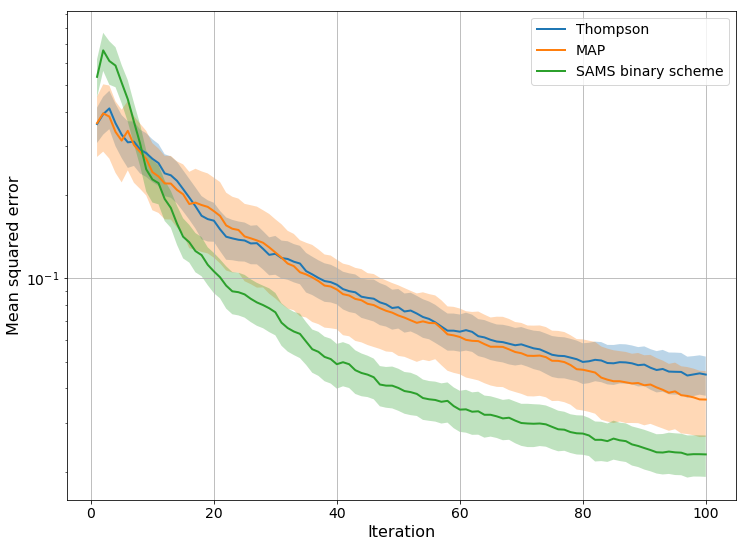

In [21]:
plt.clf()
plt.figure(figsize=(12,9))

a = 0.3
t = np.arange(1, len(mu_error_map)+1)

# BAMS Thompson
plt.semilogy(t, mu_error_thompson, lw=2, label='Thompson')
upper = mu_error_thompson + 2.0 * std_error_thompson
upper = np.reshape(upper, upper.shape[0])
lower = mu_error_thompson - 2.0 * std_error_thompson
lower = np.reshape(lower, lower.shape[0])
plt.fill_between(t, lower, upper, alpha=a)

# BAMS MAP
plt.semilogy(t, mu_error_map, lw=2, label='MAP')
upper = mu_error_map + 2.0 * std_error_map
upper = np.reshape(upper, upper.shape[0])
lower = mu_error_map - 2.0 * std_error_map
lower = np.reshape(lower, lower.shape[0])
plt.fill_between(t, lower, upper, alpha=a)

# SAMS beta=0.5
plt.semilogy(t, mu_error_sams_beta05, lw=2, label='SAMS binary scheme')
lower =  mu_error_sams_beta05 - 2.0 * std_error_sams_beta05
upper = mu_error_sams_beta05 + 2.0 * std_error_sams_beta05
plt.fill_between(t, lower, upper, alpha=a )

# SAMS beta=0.1
#plt.semilogy(t, mu_error_sams_beta01, lw=2, label='SAMS: beta=0.1')

plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Mean squared error', fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.show()

# Free energies in the range of -1 to 1
## Prior standard deviation = 100

In this example, the prior distribution is much broader than the distribution used to draw the free energies from.

In [6]:
# Loading BAMS convergence data
## Update scheme = Thompson sampling
error_thompson = np.load('t_spread=1/error_thompson.npy')
mu_error_thompson = error_thompson.mean(axis=0)
std_error_thompson = error_thompson.std(axis=0) / np.sqrt(error_thompson.shape[0])

# Update scheme = MAP estimate
error_map = np.load('t_spread=1/error_map.npy')
mu_error_map = error_map.mean(axis=0)
std_error_map = error_map.std(axis=0) / np.sqrt(len(mu_error_map))

# Loading SAMS convergence data
## Two stage procedure with beta = 0.5
error_sams_beta05 = ctools.binary_mse_multinomial(repeats=300, niterations=100, f_range=2.0, beta=0.5)
mu_error_sams_beta05 = error_sams_beta05.mean(axis=0)
std_error_sams_beta05 = error_sams_beta05.std(axis=0) / np.sqrt(error_sams_beta05.shape[0])

# Loading SAMS convergence data
## Two stage procedure with beta = 0.1
error_sams_beta01 = ctools.binary_mse_multinomial(repeats=300, niterations=100, f_range=2.0, beta=0.1)
mu_error_sams_beta01 = error_sams_beta01.mean(axis=0)
std_error_sams_beta01 = error_sams_beta01.std(axis=0) / np.sqrt(error_sams_beta01.shape[0])

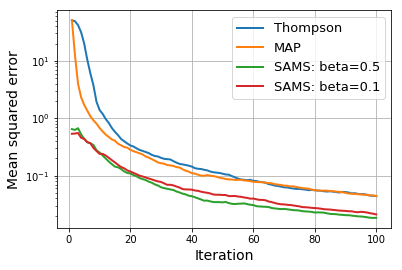

In [7]:
plt.clf()
t = np.arange(1, len(mu_error_map)+1)
# BAMS Thompson
plt.semilogy(t, mu_error_thompson, lw=2, label='Thompson')
# BAMS MAP
plt.semilogy(t, mu_error_map, lw=2, label='MAP')
# SAMS beta=0.5
plt.semilogy(t, mu_error_sams_beta05, lw=2, label='SAMS: beta=0.5')
# SAMS beta=0.1
plt.semilogy(t, mu_error_sams_beta01, lw=2, label='SAMS: beta=0.1')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)
plt.legend(fontsize=13)
plt.grid()
plt.show()